<a href="https://colab.research.google.com/github/Muhammad-Usama-07/Data-Science-Journey/blob/main/Tools_%26_Techniques_for_DataScientist/PCA_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create PCA Class

In [5]:
class PCA:
    def __init__(self, n_components): 
        self.n_components = n_components 
        self.components = None 
        self.mean = None
    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance (needs samples as columns) 
#         print('X: ', X)
        cov = np.cov(X.T)
        
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        # → eigenvector v = [:,i]
        # transpose for easier calculations eigenvectors = eigenvectors.T
        idxs = np.argsort (eigenvalues) [::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors [0: self.n_components]
        print(self.components)
    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

# Read Data

In [2]:
data = pd.read_csv('sonar.csv')
data.columns = [i for i in range(len(data.columns))]
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


# Using Fit and Transform

In [6]:
pca = PCA(2)
X = data.loc[:, :59]
pca.fit(X)
X_projected = pca.transform(X)

[[ 6.54677947e-04 -1.47072257e-02 -5.67319468e-03 -1.67224207e-02
   1.17205084e-02  3.44442475e-03 -1.79887976e-03  7.82094993e-03
   2.93603360e-02  1.15825391e-04  1.07388758e-02  7.51479589e-03
  -1.25512543e-02 -2.12894158e-02 -2.41576956e-03  1.80330927e-02
   2.17961058e-02 -2.06349403e-02 -2.61370144e-02  2.82433242e-02
  -2.66868817e-02  1.77775017e-02  6.78458578e-02 -5.98690308e-02
  -3.46239651e-02  2.56678729e-02  2.98016626e-02 -1.28050111e-02
   6.31851077e-02 -1.00002047e-01 -4.05798518e-04  2.43299994e-02
   8.04858724e-02 -1.57618979e-02  2.82873392e-02 -1.09148801e-01
  -1.05114039e-01 -1.15234828e-01 -9.87180293e-02 -8.84564954e-02
   1.16837808e-01  1.16165193e-01 -1.29343081e-01 -4.98333568e-02
   3.98756281e-01 -4.14302666e-03  6.37474828e-01 -1.82059545e-01
  -4.90394153e-01  2.48425646e-02  1.06454831e-01 -9.91513935e-03
   3.44784152e-02 -6.10112233e-02 -4.82040581e-03  1.63899050e-02
   2.15510498e-02  1.82472297e-02 -5.71647806e-02  1.21501195e-02]
 [ 7.1869

# Creating DataFrame of Components

In [7]:
pc_df = pd.DataFrame(data = X_projected
             , columns = ['principal component 1', 'principal component 2'])
pc_df.head()

,principal component 1,principal component 2
0,-0.065575,0.006608
1,-0.078999,-0.047216
2,0.049537,0.137551
3,-0.055825,-0.023088
4,-0.027312,0.130377


# Visualize Components

<Figure size 432x288 with 0 Axes>

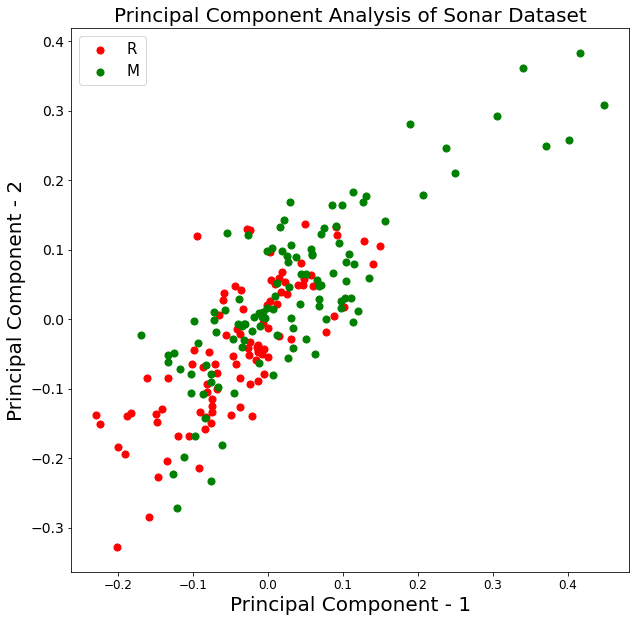

In [11]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Sonar Dataset",fontsize=20)
targets = ['R', 'M']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data[60] == target
    plt.scatter(pc_df.loc[indicesToKeep, 'principal component 1']
               , pc_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})